# Task for session2_cont and session3: 
## Edge-Preserving Denoising Filters & Feature Matching

**Instructions:**  
**please dont use .py to solve this task, just use tasks2.ipynb and edit the cells.**
- After forking the [SkyXperts-Vision-Course repo](https://github.com/ffathy-tdx/SkyXperts-Vision-Course) on GitHub. (you should have already dont this in the last session & uploaded task1)
- Go to your fork of the repo on GitHub.
- At the top, look for a yellow box that says “This branch is X commits behind…”
- Click the Sync fork or Update branch button.
The new task will show up in your tasks/ folder.  
- Upload your task to your forked repo (like you've done with task1 before)
---

## 1. DoG, LoG, and Edge-Preserving Denoising Filters

**Task:**
- Briefly read the descriptions below, then apply each filter to `'sample.jpg'` (or any test image you choose).
- Compare the results visually and write your observations.

**Background:**
- **DoG (Difference of Gaussian):** Used for edge detection by subtracting two blurred versions of the image (with different Gaussian sigmas).
- **LoG (Laplacian of Gaussian):** Uses a single Gaussian blur followed by Laplacian to highlight regions of rapid intensity change (edges).
- **Edge-Preserving Denoising (Bilateral Filter):** Smooths image while preserving edges (unlike simple Gaussian blur). You've already used this at the end of task1.

---

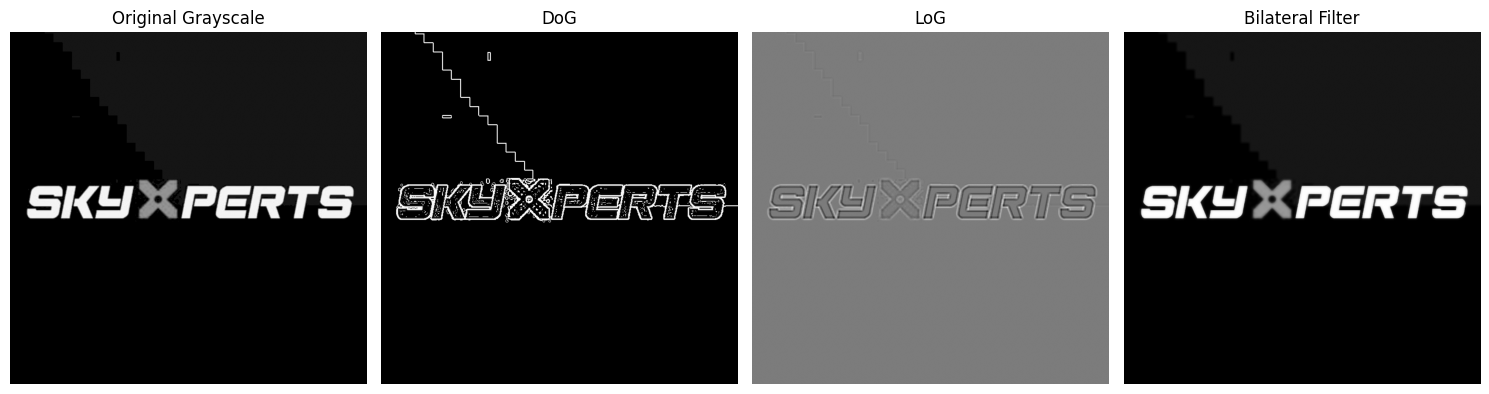

In [2]:
# Import required libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
path = './images/logo.png' 
img = cv.imread(path, 0)  # Use grayscale for filtering
#plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('Original Image'); plt.show()


# TODO: Apply DoG
gaussian1 = cv.GaussianBlur(img, (5, 5), 1)
gaussian2 = cv.GaussianBlur(img, (5, 5), 2)
dog = gaussian1 - gaussian2


# TODO: Apply LoG
log_gaussian = cv.GaussianBlur(img, (5, 5), 3.0)
log = cv.Laplacian(log_gaussian, cv.CV_32F)


# TODO: Apply bilateral (edge-preserving) filter
bilateral_filtered = cv.bilateralFilter(img, 9, 75, 75)

# Show all results for comparison

plt.figure(figsize=(15, 6))

titles = ['Original Grayscale', 'DoG', 'LoG', 'Bilateral Filter']
images = [img, dog, log, bilateral_filtered]

for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


**Q1: What differences do you observe between DoG, LoG, and the edge-preserving filter?**

_Write your observations here._

DoG -- more vulnerable to noise unlike the LoG
and teh edge preserving filyer gives more sharpen image?
im not sure if it detects the edges as DoG and LoG

## 2. Keypoints & Descriptors: SIFT vs. ORB

**Task:**
- Detect and plot keypoints on `'sample.jpg'` using SIFT and ORB.
- Compare the number and distribution of detected keypoints.

**Background:**
- **Keypoints:** Distinctive image points (corners/blobs) useful for matching.
- **Descriptors:** Vectors that describe local patches around keypoints for comparison/matching.

---

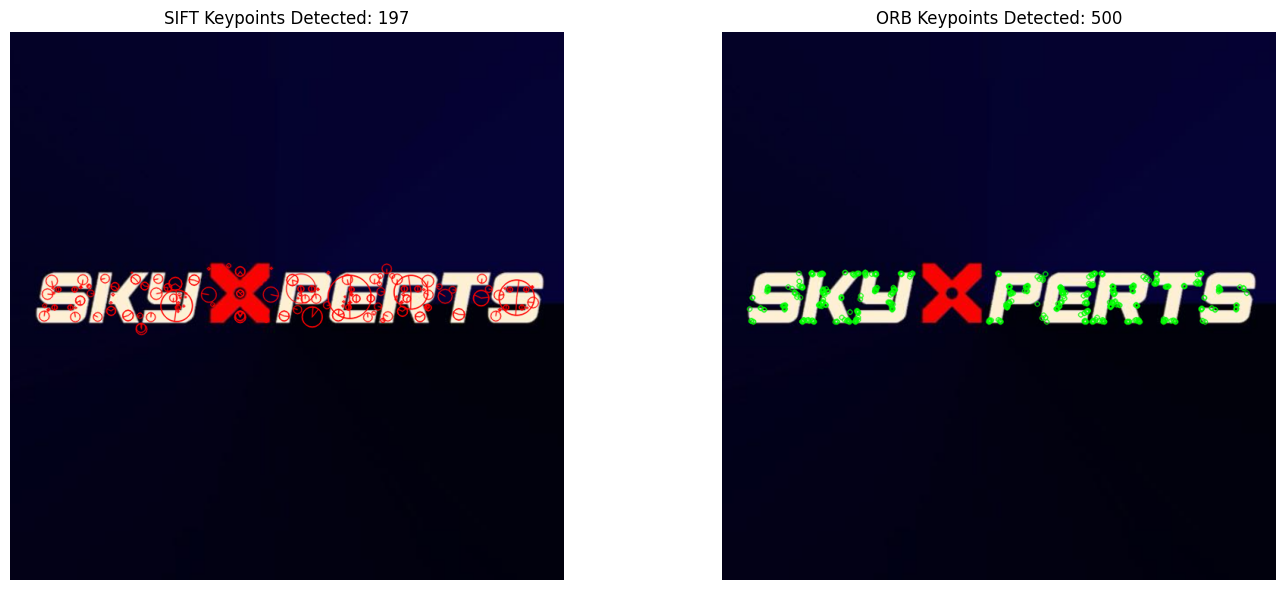

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys

path = './images/logo.png' 
img = cv.imread(path)

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Detect and plot SIFT keypoints
sift = cv.SIFT_create()
kp_sift = sift.detect(img_gray, None)
img_sift = cv.drawKeypoints(img_rgb, kp_sift, None, color=(255, 0, 0), flags=4)
num_sift = len(kp_sift)


# Detect and plot ORB keypoints
orb = cv.ORB_create()
kp_orb = orb.detect(img_gray, None)
img_orb = cv.drawKeypoints(img_rgb, kp_orb, None, color=(0, 255, 0), flags=0)
num_orb = len(kp_orb)


# TODO: Count and compare number of keypoints for SIFT and ORB
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_sift)
plt.title(f'SIFT Keypoints Detected: {num_sift}')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_orb)
plt.title(f'ORB Keypoints Detected: {num_orb}')
plt.axis('off')

plt.tight_layout()
plt.show()


**Q2: How do the number and distribution of keypoints differ between SIFT and ORB?**

_Write your answer here._

sift has lower number of kp detected comaparing to orb and also it is slower

## 3. Feature Matching with Descriptors

**Task:**
- Load a second image (e.g., `'sample2.jpg'`).
- Detect keypoints/descriptors using SIFT or ORB in both images.
- Match the features between the images using BFMatcher or FLANN.
- Plot the top matches.

**Background:**
- **Feature matching** helps recognize objects/scenes or estimate image transformations.

---

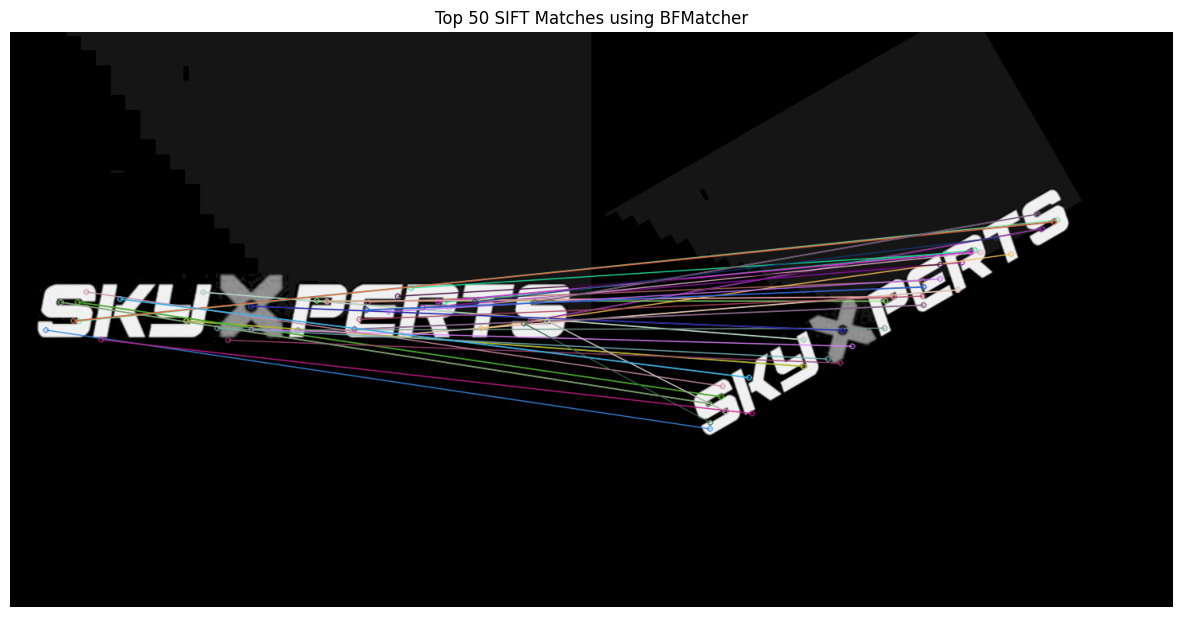

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys

path = './images/logo.png' 
img1 = cv.imread(path, 0)

# Load second image
#img2 = cv2.imread('sample2.jpg', 0)
h, w = img1.shape
center = (w // 2, h // 2)
angle = 30
scale = 0.8
M = cv.getRotationMatrix2D(center, angle, scale)
img2 = cv.warpAffine(img1, M, (w, h))

# Detect SIFT keypoints/descriptors in both images
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)


# BFMatcher with default params
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True) 


# Draw matches
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
num_matches_to_draw = 50

img_matches = cv.drawMatches(
    img1, kp1, img2, kp2, 
    matches[:num_matches_to_draw], 
    None, 
    flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(15, 8))
plt.imshow(img_matches)
plt.title(f'Top {num_matches_to_draw} SIFT Matches using BFMatcher')
plt.axis('off')
plt.show()

# bonus TODO: Try with ORB or FLANN if you like

**Q3: What do you notice about the feature matches? Are there any mismatches or errors? How might you improve the matching process?**

_Write your answer here._

i can see that if two distinct kps have similar descriptors they can be mismatched

**Bonus Task (Optional, for extra credit):**
- Try using different image preprocessing steps *before* edge detection or feature extraction.
    - For example:
        - Add noise to your image (e.g., Gaussian noise, salt-and-pepper noise).
        - Apply a sharpening filter to your image.
    - Then, run DoG, LoG, or any edge-preserving filter and observe the changes.
- **What to do:**
    - Show the results (images/plots) for at least one type of preprocessing + edge detection.
    - Briefly explain:
        - How does noise affect edge maps or keypoints?
        - Does sharpening make features easier or harder to detect/match?

**You can add your code and observations in the cells below.**


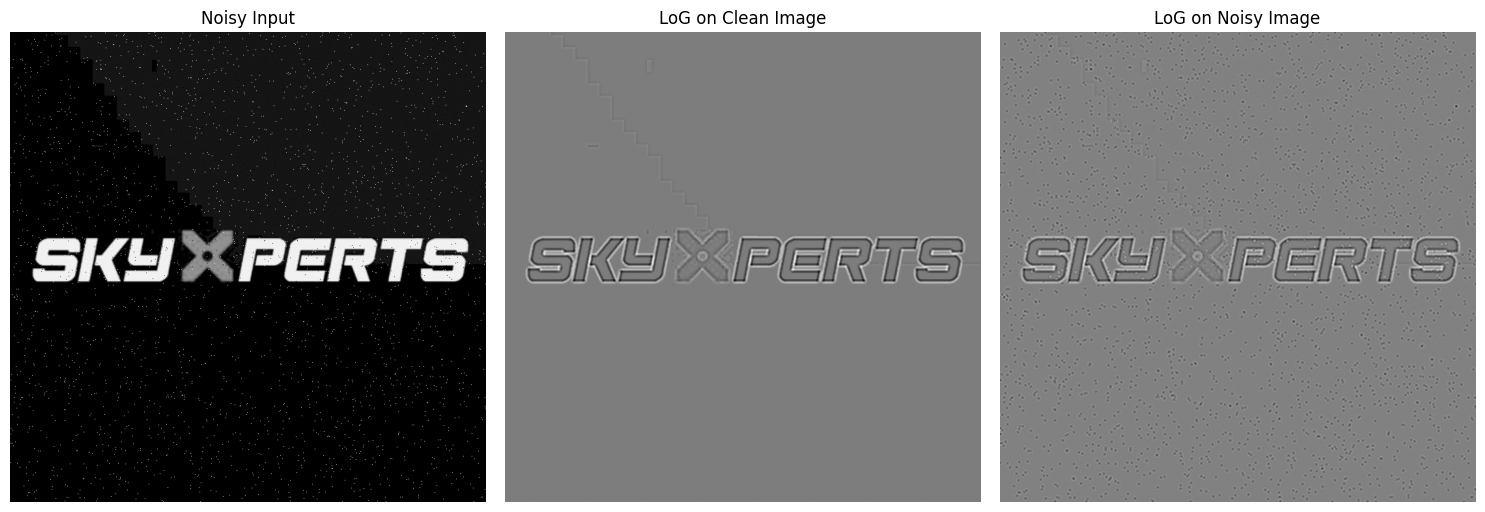

In [8]:
# Write your code here
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys

def add_salt_pepper_noise(image, density=0.03):
    """Adds salt and pepper noise to a single-channel (grayscale) image."""
    noisy_img = np.copy(image)
    num_salt_pepper = int(density * image.size)
    
    indices = np.random.randint(0, image.size, num_salt_pepper)
    salt = indices[:num_salt_pepper // 2]
    pepper = indices[num_salt_pepper // 2:]
    
    noisy_img.flat[salt] = 255
    noisy_img.flat[pepper] = 0
    
    return noisy_img

path = './images/logo.png' 
img = cv.imread(path, 0)

img_noisy = add_salt_pepper_noise(img, density=0.01)

log_gaussian = cv.GaussianBlur(img, (5, 5), 1.5)
log = cv.Laplacian(log_gaussian, cv.CV_32F)

log_gaussian_noisy = cv.GaussianBlur(img_noisy, (5, 5), 1.5)
log_noisy = cv.Laplacian(log_gaussian_noisy, cv.CV_32F)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_noisy, cmap='gray')
plt.title('Noisy Input')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(log, cmap='gray')
plt.title('LoG on Clean Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(log_noisy, cmap='gray')
plt.title('LoG on Noisy Image')
plt.axis('off')

plt.tight_layout()
plt.show()



_What are your observations?_
write them here

## 4. Reflection (Optional)

- What was the most challenging or interesting part of this task for you?
- Any feedback or thoughts?

_Write your reflection here._